In [6]:
#Image Data prepared with https://towardsdatascience.com/a-keras-pipeline-for-image-segmentation-part-1-6515a421157d
import tensorflow as tf
print(tf.version.VERSION)

2.1.0


In [7]:
#Load existing model from file
#Fill the path to your trained network
path2network='./run_training/checkpoints/'
model = tf.keras.models.load_model(path2network)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
from matplotlib.pyplot import imread
import numpy as np

def make_array(path):
    filelist = glob.glob(path)
    x = np.array([np.array(imread(fname)) for fname in filelist])
    return x

train_num=len(glob.glob('./run_training/data/train_frames/train/*.tif'))

#1-channel images
images = make_array('./run_training/data/train_frames/train/*.tif').reshape(train_num,512,512,1)


#check px values
#test=val_images.reshape(8,512,512,1)
#test[0][150]
print("train_images: "+str(images.shape))

train_images: (416, 512, 512, 1)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=8

data_gen_args = dict(rescale=1./65535,
                     rotation_range=0.2,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     fill_mode='nearest')


image_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow(
    images, y=None, shuffle=False, batch_size=BATCH_SIZE, sample_weight=None, seed=seed,
    save_to_dir=None, subset=None
)

#image_generator[0][0][150]
image_generator[51].shape

(8, 512, 512, 1)

In [10]:
results = model.predict(image_generator, verbose=1)

#Show classes instead of probabilities
pr_classes = results.argmax(axis=-1)
pr = list(pr_classes)

52/52 [==============================] - 1360s 26s/step


In [11]:
results.shape

(416, 512, 512, 1)

In [12]:
results.shape
pr = results.reshape(416,512,512)
pr[0].shape

(512, 512)

In [13]:
#Create binary masks from probabilities
output_binary = (pr > 0.1)

Num Images in Prediction: 416
Dimensions of Predicted Images: (512, 512)
Showing Prediction for Image #78


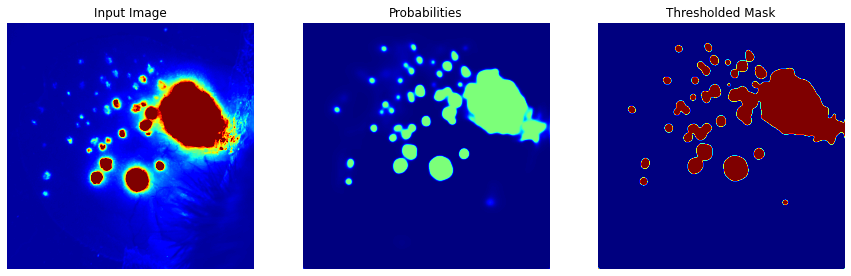

0.1466283

In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

print("Num Images in Prediction: "+str(len(pr)))
print("Dimensions of Predicted Images: "+str(pr[0].shape))


#Interesting images to show are 20, 47, 77 (3 for error)
img_to_show=77

print("Showing Prediction for Image #"+str(img_to_show+1))

img=pr[img_to_show]

cmap=["jet","jet", "jet"]
vmin=[0,0,0]
vmax=[6000,1,1]

def display(display_list):
  plt.figure(figsize=(15, 15))
  title = ['Input Image', 'Probabilities', 'Thresholded Mask']
  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(display_list[i], cmap=cmap[i], vmin=vmin[i], vmax=vmax[i])
    plt.axis('off')
  plt.show()

transpose=True

if transpose:
    pr_mask = np.rot90(pr[img_to_show].reshape(512,512).T,-1)
    out_img = np.rot90(output_binary[img_to_show].reshape(512,512).T,-1)
else:
    pr_mask = pr[img_to_show].reshape(512,512)
    out_img = output_binary[img_to_show].reshape(512,512)  

in_img = images[img_to_show].reshape(512,512)

display_list=[in_img,pr_mask,out_img]
display(display_list)

max(pr_mask[0])
#in_img[150:200]

## 

In [52]:
masks = make_array('./run_training/data/train_masks/train/*.tif').reshape(train_num,512,512,1)

mask_datagen = ImageDataGenerator(**data_gen_args)

mask_generator = mask_datagen.flow(
    masks, y=None, shuffle=False, batch_size=BATCH_SIZE, sample_weight=None, seed=seed,
    save_to_dir=None, subset=None
)

Num Images in Prediction: 416
Dimensions of Predicted Images: (512, 512)
Showing Prediction for Image #31


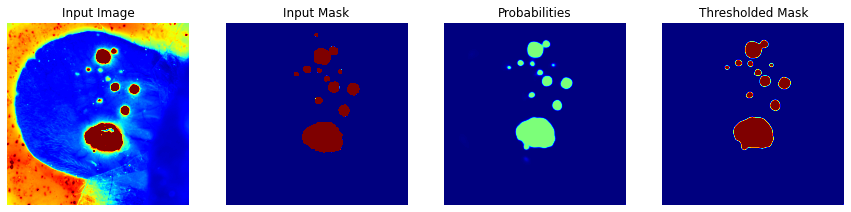

0.005116323

In [89]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

print("Num Images in Prediction: "+str(len(pr)))
print("Dimensions of Predicted Images: "+str(pr[0].shape))


#Interesting images to show are 20, 25, 47, 77 (3 for error)
img_to_show=30

print("Showing Prediction for Image #"+str(img_to_show+1))

img=pr[img_to_show]

cmap=["jet","jet","jet", "jet"]
vmin=[0,0,0,0]
vmax=[6000,1,1,1]

def display(display_list):
  plt.figure(figsize=(15, 15))
  title = ['Input Image', 'Input Mask', 'Probabilities', 'Thresholded Mask']
  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(display_list[i], cmap=cmap[i], vmin=vmin[i], vmax=vmax[i])
    plt.axis('off')
  plt.show()

transpose=True

if transpose:
    pr_mask = np.rot90(pr[img_to_show].reshape(512,512).T,-1)
    out_img = np.rot90(output_binary[img_to_show].reshape(512,512).T,-1)
else:
    pr_mask = pr[img_to_show].reshape(512,512)
    out_img = output_binary[img_to_show].reshape(512,512)  

in_img = images[img_to_show].reshape(512,512)
in_mask = masks[img_to_show].reshape(512,512)

display_list=[in_img,in_mask,pr_mask,out_img]
display(display_list)

max(pr_mask[0])
#in_img[150:200]